<a href="https://colab.research.google.com/github/RalfH1388/genai-lecture/blob/main/bigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Wir lesen zuerst die Vornamen in eine Liste aus Strings ein
# (wir müssen splitlines verwenden, um die an Hand der Zeilenumbrüche
# jeden Vornamen in eine Listenelement zu bekommen)
#from google.colab import drive
#drive.mount('https://drive.google.com/drive/folders/1s-yVqZwdRUyugkF0NEJ09TaPAxPhUwtD?usp=share_link')
namen = open('names.txt').read().splitlines()
# wir zeigen die ersten 10 - hat es geklappt?
namen[0:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
# wie viele Vornamen haben wir im Datensatz?
len(namen)

32033

In [5]:
min = len(namen[0])
for name in namen:
    if len(name) < min:
        min = len(name)
print(min)

max = len(namen[0])
for name in namen:
    if len(name) > max:
        max = len(name)
print(max)

2
15


In [6]:
haeufigkeiten = {}

#namen_modifiziert = ['<' + name + '>' for name in namen]
namen_modifiziert = ['.' + name + '.' for name in namen]
for name in namen_modifiziert:
    for i in range(len(name)-1):
        bigram = (name[i], name[i + 1])
        if bigram not in haeufigkeiten:
            haeufigkeiten[bigram] = 0
        haeufigkeiten[bigram] = haeufigkeiten[bigram] + 1

print(haeufigkeiten)


{('.', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '.'): 6640, ('.', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('.', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('.', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('.', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('.', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '.'): 3983, ('.', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('.', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '.'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '.'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'): 1650, ('i', 'l'): 1345, ('l', '.'): 1314, ('y',

In [7]:
sorted(haeufigkeiten.items(), key=lambda x: x[1], reverse = True)[:10]

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963)]

In [8]:
#pip install torch
import torch


In [9]:
#bigram_matrix = torch.zeros((28,28), dtype = torch.int32)
bigram_matrix = torch.zeros((27,27), dtype = torch.int32)

In [10]:
alle_buchstaben = sorted(set(''.join(namen)))
#buchstabe_zu_zahl = {buchstabe:zahl for zahl, buchstabe in enumerate(alle_buchstaben)}
buchstabe_zu_zahl = {buchstabe:zahl + 1 for zahl, buchstabe in enumerate(alle_buchstaben)}
#buchstabe_zu_zahl['<'] = 26
#buchstabe_zu_zahl['>'] = 27
buchstabe_zu_zahl['.'] = 0
buchstabe_zu_zahl

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [11]:
for name in namen_modifiziert:
    for i in range(len(name) - 1):
        zahl1 = buchstabe_zu_zahl[name[i]]
        zahl2 = buchstabe_zu_zahl[name[i+1]]
        bigram_matrix[zahl1, zahl2] = bigram_matrix[zahl1, zahl2] + 1

print(bigram_matrix)

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [12]:
zahl_zu_buchstabe = {zahl + 1 :buchstabe for zahl, buchstabe in enumerate(alle_buchstaben)}
#zahl_zu_buchstabe[26] = '<'
#zahl_zu_buchstabe[27] = '>'
zahl_zu_buchstabe[0] = '.'
zahl_zu_buchstabe

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

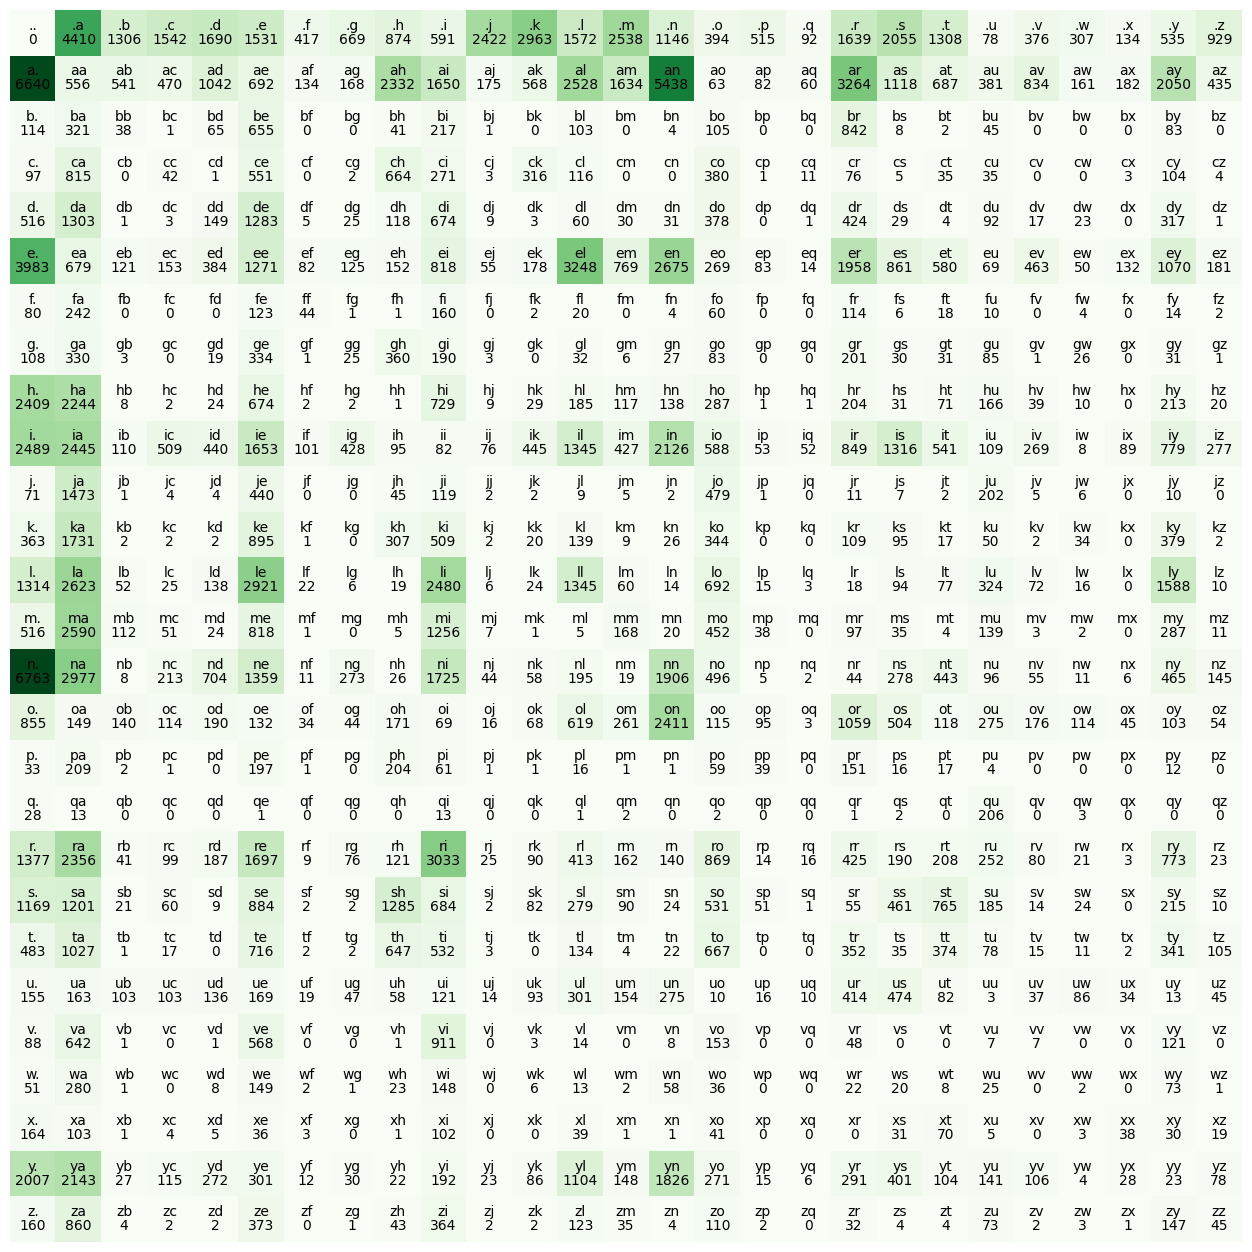

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 16))
plt.imshow(bigram_matrix, cmap ='Greens')
#for i in range(28):
for i in range(27):
    #for j in range(28):
    for j in range(27):
        bigram_plt = zahl_zu_buchstabe[i] + zahl_zu_buchstabe[j]
        plt.text(j,i, bigram_plt, ha = "center", va = "bottom", color = 'black')
        plt.text(j,i, bigram_matrix[i,j].item(), ha = "center", va = "top", color = 'black')
plt.axis('off');

In [14]:
#Konvertieren der Häufigkeiten in Wahrscheinlichkeiten; wir starten mit der
#ersten Zeile der Matrix, sprich: alle Anfänge von Namen
bigram_matrix[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [15]:
#erst zu float konvertieren, um die Normalisierung in Wahrscheinlichkeiten
#hinzubekommen (Kommazahlen)
p = bigram_matrix[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [16]:
#Generator verwenden, da wir das Ergebnis quasi-zufällig (deterministisch)
#wieder erhalten möchte, aus Demonstrationszwecken
g = torch.Generator().manual_seed(2147483647)
#diese Funktion erzeugt 3 zufällige Zahlen zwischen 0 und 1
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [17]:
#jetzt nutzen wir den Generator, um 20 Zahlen zu ziehen, die aus der
#Wahrscheinlichkeitsverteilung von p gezogen werden (p ist aktuell noch die
#3 zufällig gezogenen Zahlen von oben)
torch.multinomial(p, num_samples=100, replacement=True, generator=g)


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [18]:
#jetzt ziehen wir aus der tatsächlichen Verteilungen der Namensanfängen von
#oben
p = bigram_matrix[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [19]:
#wir nutzen den selben Generator mit der selben Seed
g = torch.Generator().manual_seed(2147483647)
#und ziehen
#torch.multinomial(p, num_samples=1, replacement=True, generator=g)
#wir bekommen den Index, wir brauchen aber den Wert, also nutzen wir .item()
#torch.multinomial(p, num_samples=1, replacement=True, generator=g)
#19 ist der Index der Zahl, aber wir brauchen den Buchstaben, der diesen Index
#hat
index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
index
zahl_zu_buchstabe[index]

10

'j'

In [20]:
#jetzt schreiben wir eine Schleife, wo wir mehrere Buchstaben nacheinander
#erzeugen (also eigene Namen); wir gehen also von Buchstabe zu Buchstabe:
#gegeben z.B. dass j gezogen wurde, gehen wir in die Zeile von j, und
#sagen den nächsten Buchstaben vorher, gegeben, dass j davor war
#wir starten bei 0, weil das der Start-Token ist (also der '.')
g = torch.Generator().manual_seed(2147483647)
index = 0
#jetzt kommt die Schleife: wir speichern die aktuelle Zeile (was in der Matrix
#der Zeile des zuletzt vorhergesagten Buchstabens entspricht (am Anfang '.')) in
#p ab, normalisieren es zu Wahrscheinlichkeiten, und ziehen daraus mit
#multinomial; wenn wir wieder bei index = 0 ankommen, sind wir offensichtlich
#am Ende des Wortes und beenden die Schleife
while True:
  p = bigram_matrix[index].float()
  p = p / p.sum()
  index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
  print(zahl_zu_buchstabe[index])
  if index == 0:
    break


j
u
n
i
d
e
.


In [21]:
#Lass uns nun mehr Namen ziehen; wir erzeugen eine Liste und schreiben alle
#Ergebnisse dort rein
g = torch.Generator().manual_seed(2147483647)

for i in range(20):

  out = []
  index = 0

  while True:
    p = bigram_matrix[index].float()
    p = p / p.sum()
    index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(zahl_zu_buchstabe[index])
    if index == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [22]:
#das sieht jetzt noch nicht aus wir vernünftige Namen! warum? weil ein Bigram
#Modell nur den vorhergehenden Buchstaben als Kontext für den nächsten
#Buchstaben herzieht!
#allerdings sehen wir, dass unser erstes Modell sinnvollere Ergebnisse erzeugt,
#als wenn wir nur zufällig Buchstaben ziehen würden:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):

  out = []
  index = 0

  while True:
    #p = bigram_matrix[index].float()
    #p = p / p.sum()
    p = torch.ones(27)/27.0
    index = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(zahl_zu_buchstabe[index])
    if index == 0:
      break
  print(''.join(out))



juwjdvdipkcqaz.
p.
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.
rkrrsru.
iyumuyfy.
mjekujcbkhvupwyhvpvhvccragr.
wdkhwfdztta.
mplyisbxlyhuuiqzavmpocbzthqmimvyqwat.
f.
.
ndxjxfpvslqtikyzsaloevgvvnundewkfmbjzqegruxiteaxchwtmurzsodridcdznojvaliypvrghvxtezrwguciqqvywhqelv.
viosvhibdhnceukgmtmwboscnbzoiwupnwnpipixtewbgsgyewfdacbfcxrvjypkmsbranmjrdsydotafvkdkbdepihzpwzsqdab.
vfuolwbasrtugttbiqbujfdtskceqjtcdlcndfujqllsppgkltalmlokdmsl.
fddmxjv.
mfsgxmw.
vdihkvngtojvrdsyqivcob.
uziengogtjvnvqgfjtkqufrxfjlwglykiiluohgnoiuwzylq.
fsgircvmhtipagkxwvjypnsriadmfujnlkcicvatjvryzeljxkbrlrjsp.
